In [3]:
from marvin import config
config.access

'public'

In [4]:
import marvin

In [5]:
my_cube = marvin.tools.Cube('8485-1901') # Try passing a list of strings
my_cube

<Marvin Cube (plateifu='8485-1901', mode='remote', data_origin='api')>

In [6]:
print(my_cube.filename, my_cube.plateifu, my_cube.mangaid, my_cube.release)

None 8485-1901 1-209232 DR17


In [7]:
print(my_cube.ra, my_cube.dec)

232.544703894 48.6902009334


In [8]:
my_cube.header

CHECKSUM= 'EcA8HZ77EbA7EZ77'   / HDU checksum updated 2020-12-03T14:10:52       
DATASUM = '3419504613'         / data unit checksum updated 2020-12-03T14:10:52 
EXTNAME = 'FLUX    '                                                            
QUALDATA= 'MASK    '           / Mask extension name                            
ERRDATA = 'IVAR    '           / Error extension name                           
HDUCLAS2= 'DATA    '                                                            
HDUCLAS1= 'CUBE    '                                                            
HDUCLASS= 'SDSS    '           / SDSS format class                              
CUNIT2  = 'deg     '                                                            
CUNIT1  = 'deg     '                                                            
CTYPE2  = 'DEC--TAN'                                                            
CTYPE1  = 'RA---TAN'                                                            
CD2_2   = '0.000138889'     

In [9]:
my_cube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVE-LOG'  
CRVAL : 232.5447  48.690201  3.62159598486e-07  
CRPIX : 18.0  18.0  1.0  
PC1_1 PC1_2 PC1_3  : -0.000138889  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  0.000138889  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  8.33903304339e-11  
CDELT : 1.0  1.0  1.0  
NAXIS : 0  0

In [10]:
help(my_cube.wcs)

Help on WCS in module astropy.wcs.wcs object:

class WCS(astropy.wcs.wcsapi.fitswcs.FITSWCSAPIMixin, astropy.wcs.WCSBase)
 |  WCS(header=None, fobj=None, key=' ', minerr=0.0, relax=True, naxis=None, keysel=None, colsel=None, fix=True, translate_units='', _do_set=True)
 |  
 |  WCS objects perform standard WCS transformations, and correct for
 |  `SIP`_ and `distortion paper`_ table-lookup transformations, based
 |  on the WCS keywords and supplementary data read from a FITS file.
 |  
 |  See also: https://docs.astropy.org/en/stable/wcs/
 |  
 |  Parameters
 |  ----------
 |  header : `~astropy.io.fits.Header`, `~astropy.io.fits.hdu.image.PrimaryHDU`, `~astropy.io.fits.hdu.image.ImageHDU`, str, dict-like, or None, optional
 |      If *header* is not provided or None, the object will be
 |      initialized to default values.
 |  
 |  fobj : `~astropy.io.fits.HDUList`, optional
 |      It is needed when header keywords point to a `distortion
 |      paper`_ lookup table stored in a diffe

In [11]:
datamodel = my_cube.datamodel
datamodel

<DRPCubeDataModel release='MPL-11', n_datacubes=3, n_spectra=2>

In [12]:
datamodel.datacubes

[<DataCube 'flux', release='MPL-11', unit='1e-17 erg / (Angstrom cm2 s spaxel)'>,
 <DataCube 'dispersion', release='MPL-11', unit='Angstrom'>,
 <DataCube 'dispersion_prepixel', release='MPL-11', unit='Angstrom'>]

In [13]:
datamodel.spectra # Don't understand the spectral resolution thing

[<Spectrum 'spectral_resolution', release='MPL-11', unit='Angstrom'>,
 <Spectrum 'spectral_resolution_prepixel', release='MPL-11', unit='Angstrom'>]

In [14]:
datamodel.datacubes.dispersion_prepixel.description

'Broadened pre-pixel dispersion solution (1sigma LSF)'

In [15]:
flux = my_cube.flux

In [16]:
flux # Why is it a 3D array?
# Two axes correspond to the spatial distribution of the IFUs,
# one axis corresponds to the spectral data

<DataCube [[[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           ...,

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
      

In [17]:
flux.ivar # What is this

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
flux.mask # And this 

array([[[1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        ...,
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027]],

       [[1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        ...,
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027]],

       [[1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        ...,
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027],
        [1027, 1027, 1027, ..., 1027, 1027, 1027]],

       ...,

       [[1027, 1027, 102

In [19]:
flux[:, 20:30, 20:30]

<DataCube [[[ 0.16993436,  0.08706038,  0.01384934, ..., -0.01029592,
             -0.05066531, -0.10312589],
            [ 0.14760597,  0.0943291 ,  0.05186407, ...,  0.05019792,
             -0.02873467, -0.07964858],
            [ 0.0872567 ,  0.07532874,  0.06283212, ...,  0.1387772 ,
              0.04841734, -0.10404002],
            ...,
            [ 0.01738775, -0.0112974 , -0.07668007, ...,  0.        ,
              0.        ,  0.        ],
            [ 0.02141872, -0.06150662, -0.1506245 , ...,  0.        ,
              0.        ,  0.        ],
            [ 0.00702501, -0.13214831, -0.21691003, ...,  0.        ,
              0.        ,  0.        ]],

           [[ 0.19811325,  0.15296985,  0.08419596, ..., -0.07693487,
             -0.09368153, -0.10438415],
            [ 0.18340991,  0.14441161,  0.09669204, ..., -0.04702153,
             -0.0779875 , -0.10190182],
            [ 0.11806185,  0.09827705,  0.0614339 , ...,  0.01160757,
             -0.06231598, -0.11

In [20]:
spectrum = flux[:,25,25]

[WARNING]: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError. (AstropyDeprecationWarning)


<AxesSubplot:xlabel='$\\mathrm{Wavelength}\\,[$$\\mathrm{\\mathring{A}}$$]$', ylabel='$\\mathrm{Flux}\\,[$$\\mathrm{1 \\times 10^{-17}\\,erg\\,\\mathring{A}^{-1}\\,s^{-1}\\,spaxel^{-1}\\,cm^{-2}}$$]$'>

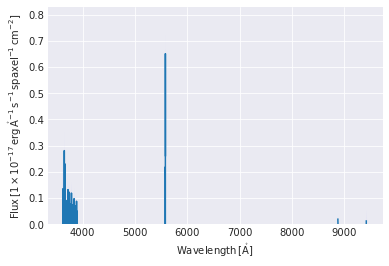

In [21]:
spectrum.plot() # What is going on here?

In [22]:
spectrum.min() # huh what

<Spectrum -0.73500782 1e-17 erg / (Angstrom cm2 s spaxel)>

In [23]:
my_cube.spectral_resolution

<Spectrum [1336.54629559, 1335.94755562, 1335.35122327, ..., 1917.84100653,
           1918.28265658, 1918.72440834] Angstrom>

In [24]:
hyb_maps = my_cube.getMaps(bintype='HYB10') # what's bintype

In [25]:
hyb_maps.datamodel

[<Property 'spx_skycoo', channel='on_sky_x', release='3.1.0', unit='arcsec'>,
 <Property 'spx_skycoo', channel='on_sky_y', release='3.1.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='elliptical_radius', release='3.1.0', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='r_re', release='3.1.0', unit=''>,
 <Property 'spx_ellcoo', channel='r_h_kpc', release='3.1.0', unit='kpc / h'>,
 <Property 'spx_ellcoo', channel='elliptical_azimuth', release='3.1.0', unit='deg'>,
 <Property 'spx_mflux', channel='None', release='3.1.0', unit='1e-17 erg / (cm2 s spaxel)'>,
 <Property 'spx_snr', channel='None', release='3.1.0', unit=''>,
 <Property 'binid', channel='binned_spectra', release='3.1.0', unit=''>,
 <Property 'binid', channel='stellar_continua', release='3.1.0', unit=''>,
 <Property 'binid', channel='em_line_moments', release='3.1.0', unit=''>,
 <Property 'binid', channel='em_line_models', release='3.1.0', unit=''>,
 <Property 'binid', channel='spectral_indices', release='3.1.0', unit=''>

In [26]:
hyb_maps.datamodel.specindex_bf_cah1.description # there are so many properties
# what to do with them all
# calling datamodel will take you to a description of the properties
# if you want to access the actual data, directly call it on the object

'Measurements of spectral indices using a modified definition from Burstein (1984) and Faber (1985). Channel = CaH1.'

In [27]:
ha = hyb_maps.emline_ga_ha_6564line

[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Amplitude of Fitted Gaussians: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

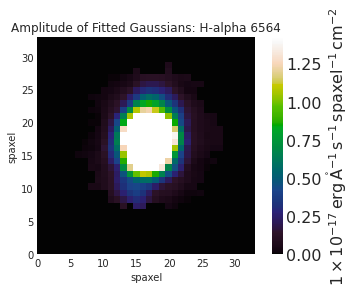

In [28]:
ha.plot()

In [45]:
flux.unit

Unit("1e-17 erg / (Angstrom cm2 s spaxel)")

In [46]:
flux.value[1000,20,20]

0.2961113154888153

In [43]:
flux.ivar[1000,20,20] # Don't understand the inverse variance

3271.51123046875

In [44]:
flux.error[1000,20,20]

<Quantity 0.0174834 1e-17 erg / (Angstrom cm2 s spaxel)>

In [49]:
dir(flux)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [54]:
flux.snr[1000,20,20] # how is this calculated

16.936716242252913

In [55]:
flux.masked

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --,

In [58]:
spectrum_20_20 = flux[:,20,20]
spectrum_20_20_ivar = flux.ivar[:,20,20]

[WARNING]: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError. (AstropyDeprecationWarning)


<AxesSubplot:xlabel='$\\mathrm{Wavelength}\\,[$$\\mathrm{\\mathring{A}}$$]$', ylabel='$\\mathrm{Flux}\\,[$$\\mathrm{1 \\times 10^{-17}\\,erg\\,\\mathring{A}^{-1}\\,s^{-1}\\,spaxel^{-1}\\,cm^{-2}}$$]$'>

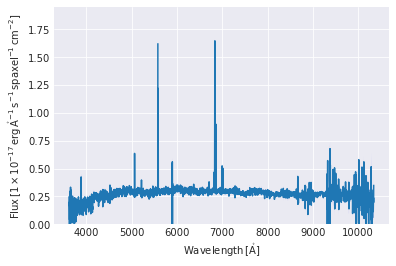

In [66]:
spectrum_20_20.plot()

In [75]:
corrected = 1/spectrum_20_20_ivar * spectrum_20_20.unit + spectrum_20_20

[WARNING]: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError. (AstropyDeprecationWarning)


<AxesSubplot:xlabel='$\\mathrm{Wavelength}\\,[$$\\mathrm{\\mathring{A}}$$]$', ylabel='$\\mathrm{Flux}\\,[$$\\mathrm{1 \\times 10^{-17}\\,erg\\,\\mathring{A}^{-1}\\,s^{-1}\\,spaxel^{-1}\\,cm^{-2}}$$]$'>

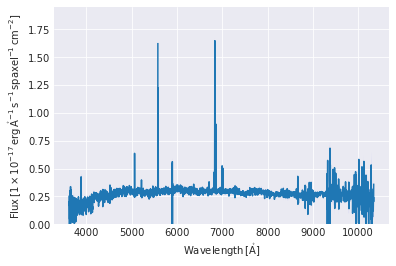

In [78]:
corrected.plot()

In [80]:
map_cube = marvin.tools.Cube('7443-12703')

In [82]:
map1 = marvin.tools.Maps('7443-12703')

In [83]:
ha1 = map1. # there's so many things idk what to do

[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian flux: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

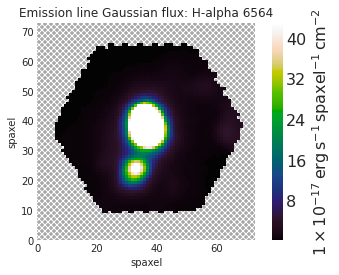

In [85]:
ha1.plot()